# Mezclador activo.

El mezclador pasivo más utilizado es el mezclador de diodo doble balanceado. 
Su rango dinámico, figura de ruido moderada y buen rendimiento general lo convierten en una opción popular. 
Sin embargo, es imposible evitar su pérdida de conversión. 
Aquí es donde entran en juego los mezcladores activos. 
No solo pueden proporcionar ganancia, sino que también necesitan menos potencia de accionamiento LO para funcionar. 

Cubrir cada arquitectura de mezclador activo no sería muy útil, solo hay dos formas en que los dispositivos activos se pueden usar para crear un mezclador: por acción de conmutación como en el mezclador de diodo doble balanceado, o explotando la no linealidad de un dispositivo activo para aproximar la multiplicación.


## Mezclador empleando un JFET


![ex 2.13](/fig/jfet_basic.png)

Si bien es probable que sea el circuito más simple de construir, cómo es capaz de multiplicar señales no es nada intuitivo. Este es uno de los pocos mezcladores activos que realmente no depende de la conmutación, sino que explota la característica no lineal de un JFET. 
El análisis del circuito revelará cómo exactamente este circuito puede multiplicar señales.

Primero, recordemos la ecuación característica de un JFET, que vincula el voltaje de la puerta-fuente con la corriente de drenaje de salida, donde la respuesta de corriente para un JFET de respuesta cuadratica es:

$I_{dq} = I_{DSS} \cdot (1 - \frac{V_{GS}}{V_P})^2$   

Donde:

    $I_{dq}$ siendo la corriente de drenaje de salida
    $I_ {DSS}$ siendo la corriente de saturación JFET
    $V_ {GS} = V_G - V_S$
    $V_P$ siendo el voltaje de corte del JFET.

En este circuito, la señal de RF se aplica en el Gate, mientras que la señal LO se aplica en Source. 
Sea la señal RF 

$V_{RF} = A cos(2 \pi f_{RF} t)$ 

y la señal LO 

$v_{LO} = v_{pol} + B cos(2 \pi f_{OL} t)$. 

El voltaje Gate-Source se convierte en:

$V_{GS} = v_{RF} - v_ {LO} = A cos(2 \pi f_{RF} t) - v_{pol} - B cos(2 \pi f_{OL} t)$


Reemplazando $V_ {GS}$ en la ecuación con la expresión anterior, obtenemos:


$I_{dq} = I_{DSS} \cdot (1 - \frac{V_{GS}}{V_P})^2$   

Desarrollando el cuadrado

$(1-\frac{v_{gs}}{v_c})^2 = 1 - 2 \frac{v_{gs}}{v_c} + (\frac{v_{gs}}{v_c})^2$

$(v_{RF} - v_{OL})^2 = v_{RF}^2  - 2 v_{RF} v_{OL} + v_{OL}^2$



$(1-\frac{v_{gs}}{v_c})^2 = 1 - 2 \frac{v_{RF} - v_{OL}}{v_c} + \frac{v_{RF}^2  - 2 v_{RF} v_{OL} + v_{OL}^2}{v_c^2}$

Entonces 

$I_{dq} = I_{DSS} \cdot (1 -  \frac{2 v_{RF}}{v_c} - \frac{2 v_{OL}}{v_c} + \frac{v_{RF}^2}{v_c^2}  - \frac{2 v_{RF} v_{OL}}{v_c^2} + \frac{v_{OL}^2}{v_c^2})$

Observe el último término de la expresión anterior se observa el temino de la muestra

$I_{DSS} \frac{2 v_{RF} v_{OL}}{v_c^2}$

Esta ecuación se está volviendo complicada, así que simplifiquemos todas las constantes y veamos con qué frecuencias terminamos:

$I_D = a_1 + a_2 cos(2 \pi f_{RF} t) + a_3 sin(2 \pi f_{OL} t) + a_4 cos^2(2 \pi f_{} t) +  a_5 cos^2(2 \pi f_{OL} t) + a_6 sin(2 \pi f_1 t) sin(2 \pi f_2 t)$

Por lo tanto, nuestra corriente de drenaje de salida consta de las siguientes frecuencias:

    $f_{RF}$
    $f_{OL}$
    $2 f_{RF}$
    $2 f_{OL}$
    $f_{RF} - f_{OL}$
    $f_{RF} + f_{OL}$

Nuestra frecuencia deseada son $f_{RF} - f_{OL}$ o $f_{RF} + f_{OL}$. 

Independientemente de cuál se desee, las otras frecuencias no deseadas están muy lejos y, por lo tanto, se pueden filtrar.

Este circuito JFET y sus matemáticas subyacentes forman la base de los mezcladores JFET. Muchos mezcladores JFET prácticos son simplemente variaciones de este.


## Ejemplo, ejercicio mezclador JFET

La figura muestra el circuito de un mezclador  a FET y el circuito equivalente del elemento activo. 


![5-cuatrocientos](fig/mezclador_jfet_2N3819.png)


Datos de los mismos son:

$V_{rf}$ : sinusoide pura con $Vpico= 10 mV$ y frecuencia $10 MHz$. 

$r_{rf} = 1 Kohm$.

$V_{ol}$: sinusoide pura con $V_{pico}= 1 V$ y frecuencia $11 MHz$.

$r_{OL} = 1 Kohm$.


Los capacitores de acople CA son cortocircuitos a todas las frecuencias de interés. 

Los elementos reactivos no tienen pérdidas.


$L_1/C_1$ resuenan a $10 MHz$.

$L_2/C_2$ resuenan a $11 MHz$.

$L_3/C_3$ resuenan a $1 MHz$.

$R_L= 250 Kohms$ 



El FET puede considerarse cuadrático con $I_{dss}= 12 mA$ y  $V_c=-3V$.

$I_d = I_{dss} (1 - \frac{v_{gs}}{v_c})^2$

$Y_{in}(10MHz) = j \omega 20\times10^{-12}$ 

$Y_{out}(1MHz) = 4\times 10^{-6} S $ 


Determinar:

1. RS para $I_{dq}= 3 mA$
2. Valor pico de la componente de VRL en $1 MHz$
3. Valor pico de la componente de VRL en $10 MHz$
4. Valor pico de la componente de VRL en $11 MHz$
5. Valor pico de la componente de VRL en $2 MHz$
6. Valor pico de la componente de VRL en $22 MHz$
7. Potencia entregada por el oscilador local


![5-cuatrocientos](fig/mezclador_jfet_modelo.png)

## 1. RS para $I_{dq}= 6 mA$


La respuesta de corriente para un FET de respuesta cuadratica 

$$I_{dq} = I_{DSS} \cdot (1 - \frac{V_{GS}}{V_P})^2$$

Despejando 

$$V_{GS} = V_P \cdot (\sqrt{\frac{I_{dq}}{I_{DSS} }} + 1)$$

$$V_{GS} = -3V \cdot (-\sqrt{\frac{6 mA}{12 mA}} + 1)$$

$$V_{GS} = -0.878 V$$

Si $V_G = 0V$

$$V_S = 0.878 V$$

$$V_S = I_{ds} \cdot R_S$$

$$R_S = \frac{V_S}{I_{ds}} = \frac{0.878 V}{6 mA} = 146.4 \Omega$$




## 2.   Corriente $I_d$ dada las variaciones de $V_{OL}$

Para simplificar el analisis, suponemos que la admitancia de entrada $Y_{in}=0$

Por lo tanto, la tension de gate es igual a $v_{RF}$ y la tensión de source es igual a $v_{OL}$

Ademas, pasivamos la fuente de $v_{RF}$.

De la respuesta cuadratica del FET

$$I_{dq} = I_{DSS} \cdot (1 - \frac{V_{GS}}{V_P})^2$$

Remplazando por $V_{GS} = - V_{pol}  - V_{OL} \cdot cos(\omega_{OL} t)$

$$I_{dq} = I_{DSS} \cdot (1 + \frac{ V_{pol} + V_{OL} \cdot cos(\omega_{OL} t)}{V_P})^2$$

Operando aritmeticamente

$$I_{dq} = \frac{I_{DSS}}{V_p^2} \cdot [(V_p + V_{pol})^2 + 2  \cdot (V_p + V_{pol}) \cdot V_{OL} \cdot cos(\omega_{OL} t) + V_{OL}^2 \cdot cos^2(\omega_{OL} t)] $$

Usando la identidad trigonometrica $cos^2(\omega_{OL} t) = \frac{1}{2} + \frac{1}{2}  \cdot cos(2 \cdot \omega_{OL} t)$

$$I_{dq} = \frac{I_{DSS}}{V_p^2} \cdot [(V_p + V_{pol})^2 + 2  \cdot (V_p + V_{pol}) \cdot V_{OL} \cdot cos(\omega_{OL} t) + V_{OL}^2 \cdot (\frac{1}{2} + \frac{1}{2}  \cdot cos(2 \cdot \omega_{OL} t))] $$


$$I_{dq} = \frac{I_{DSS}}{V_p^2} \cdot [(V_p + V_{pol})^2 + \frac{V_{OL}^2}{2} + 2  \cdot (V_p + V_{pol}) \cdot V_{OL} \cdot cos(\omega_{OL} t) +  \frac{V_{OL}^2}{2}  \cdot cos(2 \cdot \omega_{OL} t))] $$


## Transconductancia $g_m$

La transconductancia $g_m$ se puede calcular como 


$$g_m = \frac{dI_{dq}}{d V_{GS}} = -2 \cdot \frac{I_{DSS}}{V_P} \cdot (1 - \frac{V_{GS}}{V_P})$$


Siendo $V_{GS} = - V_{pol}  - V_{OL} \cdot cos(\omega_{OL} t)$,  la transconductancia instantanea entonces


$$g_m(t) =  -2 \frac{I_{DSS}}{V_P} \cdot ( 1 + \frac{( V_{pol}  + V_{OL} \cdot cos(\omega_{OL} t))}{V_P} )$$


$$g_m(t) =   \frac{-2 \cdot I_{DSS}}{V_P} \cdot ( 1 + \frac{V_{pol}}{V_P} ) -  \frac{2 \cdot I_{DSS}\cdot V_{OL}}{V_P^2}  \cdot cos(\omega_{OL} t)$$


$$g_m(t) =  -10.34 mS +  1.33mS  \cdot cos(\omega_{OL} t)$$



Las variaciones de $v_{gen}$ no afectan al punto de operación del dispositivo. 

Por lo tanto, el calculo de $I_{ds}(t)$

$$I_{ds}(t) = g_m(t) \cdot V_{gen}(t)$$




## Analisis de las componentes de corriente empleando $v_{gs}$


Vamos a analizar el valor de la corriente en funcion de $V_{GS}$. 

Sabemos que la trasferencia del dispositivo se puede obtener mediante la función transferencia.

$i_d = Idss (1-\frac{v_{gs}}{v_c})^2$

Donde $i_d$ corresponde a un generador de corriente controlado por $v_{gs}$.

La tensión $v_{gs}$ depende de la fuente de tensión $v_{OL}$ y $v_{RF}$

$v_{OL} = V_{ol} cos(\theta_{OL})$ 

$v_{RF} = V_{rf} cos(\theta_{RF})$ 

Entonces 

$v_{gs} = v_{RF} - V_{pol} - v_{OL}$  

Por lo tanto la corriente a la salida se puede expresar como 

$v_{gs} = v_{RF} - V_{pol} - v_{OL}$  


Desarrollando el cuadrado

$(1-\frac{v_{gs}}{v_c})^2 = 1 - 2 \frac{v_{gs}}{v_c} + (\frac{v_{gs}}{v_c})^2$

$(v_{RF} - V_{pol} - v_{OL})^2 = v_{RF}^2 - 2 v_{RF} V_{pol} - 2 v_{RF} v_{OL} + V_{pol}^2 + 2 V_{pol} v_{OL} + v_{OL}^2$


$(v_{RF} - V_{pol} - v_{OL})^2 = v_{RF}^2 - 2 v_{RF} V_{pol} - 2 v_{RF} v_{OL} + V_{pol}^2 + 2 V_{pol} v_{OL} + v_{OL}^2$


$(1-\frac{v_{gs}}{v_c})^2 = 1 - 2 \frac{v_{gs}}{v_c} + \frac{v_{RF}^2 - 2 v_{RF} V_{pol} - 2 v_{RF} v_{OL} + V_{pol}^2 + 2 V_{pol} v_{OL} + v_{OL}^2}{v_c^2}$


$(1-\frac{v_{gs}}{v_c})^2 = 1 - \frac{2}{v_c} (v_{RF} - V_{pol} - v_{OL}) + \frac{1}{v_c^2} (v_{RF}^2 - 2 v_{RF} V_{pol} - 2 v_{RF} v_{OL} + V_{pol}^2 + 2 V_{pol} v_{OL} + v_{OL}^2)$



![5-cuatrocientos](fig/ecuacion_jfet.png)





In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

from scipy.fftpack import fft, fftfreq, ifft
from time import time



from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 12,
          'figure.figsize': (8, 8),
         'axes.labelsize': 12,
         'axes.titlesize': 12,
         'xtick.labelsize':12,
         'ytick.labelsize':12}
plt.rcParams.update(params) 




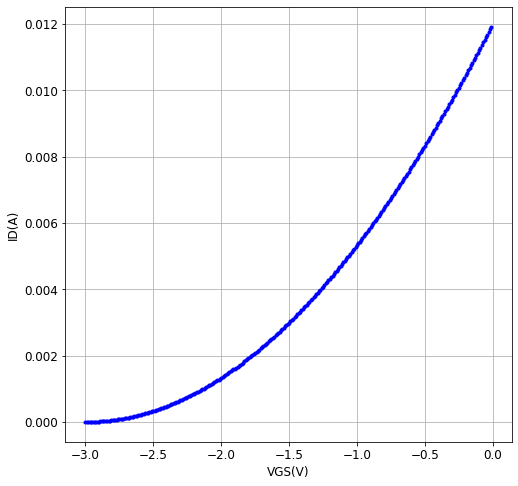

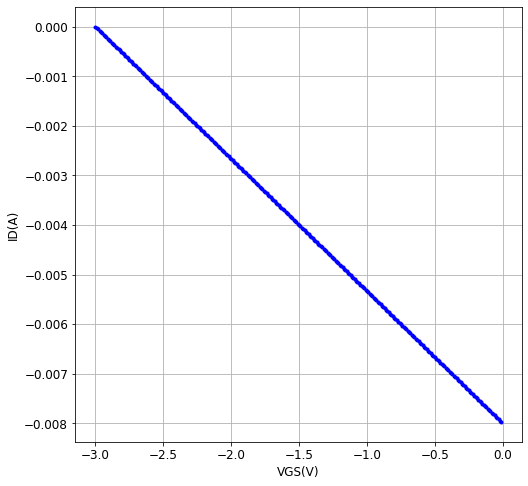

In [24]:
def idi(v, Idss = 12e-3, vc=-3):
    i =  0.              if (v < vc)                else 0
    i = Idss*(1-v/vc)**2 if (v >= vc  and v < 0)    else i
    i = Idss             if (v >= 0 )               else i
    return i


def gmi(v, Idss = 12e-3, vc=-3):
    i =  0.              if (v < vc)                else 0
    i = 2*Idss/vc*(1-v/vc) if (v >= vc  and v < 0)    else i
    i = Idss             if (v >= 0 )               else i
    return i


Idss = 12e-3
vc   = -3

vgsa = np.arange(-3,0,0.01)
idsa = np.array([idi(vgs, Idss, vc) for vgs in vgsa])
gma = np.array([gmi(vgs, Idss, vc) for vgs in vgsa])


plt.plot(vgsa,idsa,'b.')
#plt.axis([-5, 15, -1, 30])
plt.grid()
plt.ylabel('ID(A)')
plt.xlabel('VGS(V)')
plt.show()


plt.plot(vgsa,gma,'b.')
#plt.axis([-5, 15, -1, 30])
plt.grid()
plt.ylabel('ID(A)')
plt.xlabel('VGS(V)')
plt.show()

In [40]:
#Calculos 
#parametros de la senal 
fol   =  11e6 #Hz
frf   =  10e6

#tiempo de un periodo de la modulante
# se que la menor frecuencia que quiero en el espectro es 
fm  = 0.5e6
Tm  = 1/fm

#Muestreo (Recordatorio : Nysquist)
fmax= 22e6
# muestreo (mayor a dos)
ns  =  10   
fs  =  ns*(fmax)
ds  = 1/(fs) ##delta time para el calculo de los armonicos


time = np.arange(0,Tm,ds)   

Vpol= 1.5

vol = Vpol +1   * np.cos(2*np.pi*fol*time)

vrf = 10e-3 * np.cos(2*np.pi*frf*time)

vgst = vrf - vol

Idss = 12e-3

vc   = -3

idst = np.array([idi(vgs, Idss, vc) for vgs in vgst])




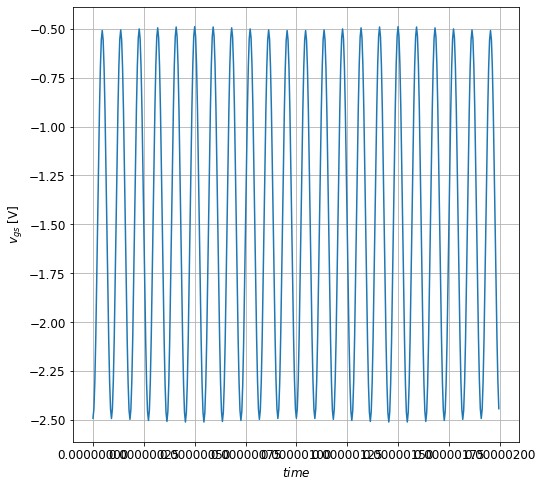

In [41]:
plt.plot(time, vgst)
plt.ylabel('$v_{gs}$ [V]')
plt.xlabel('${time}$')

plt.grid()
plt.show()



/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


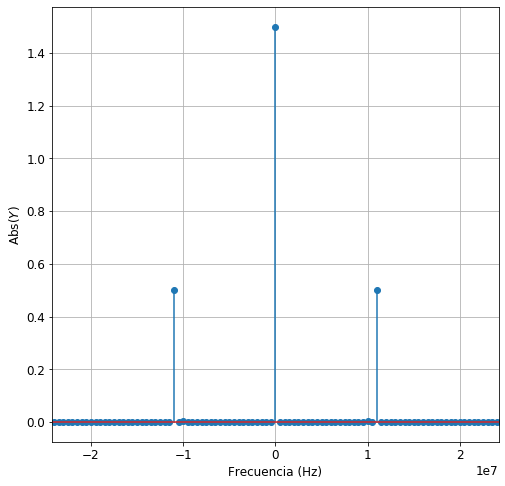

In [42]:
# FFT
Fvgs = fft(vgst) / len(vgst)  # Normalizada

frq = fftfreq(len(vgst), ds)  # Recuperamos las frecuencias

plt.stem(frq, np.abs(Fvgs) )  

plt.xlim(-(fol)*2.2,(fol)*2.2)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()

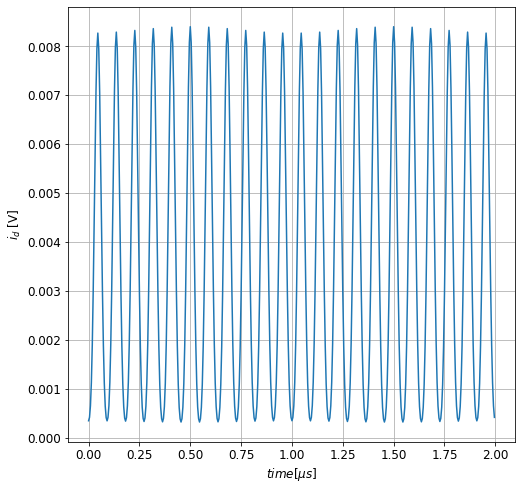

In [47]:
plt.plot(time/1e-6, idst)
plt.ylabel('$i_{d}$ [A]')
plt.xlabel('${time} [\mu s]$')

plt.grid()
plt.show()



/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


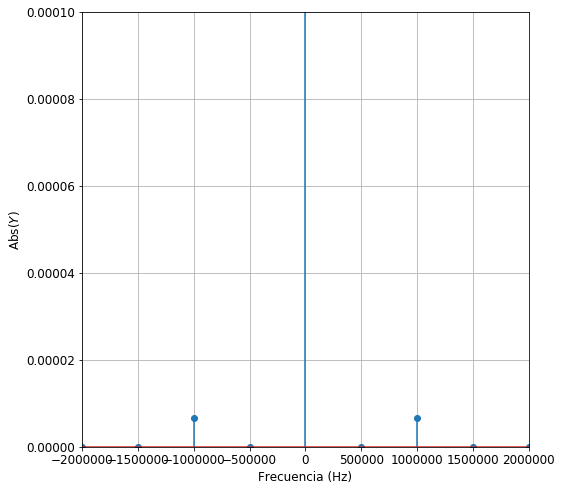

In [48]:
# FFT
Fids = fft(idst) / len(idst)  # Normalizada

frq = fftfreq(len(idst), ds)  # Recuperamos las frecuencias

plt.stem(frq, np.abs(Fids))  

plt.xlim(-2e6,2e6)
plt.ylim(0,100e-6)

plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()

In [63]:
def FiltroQ(i, f, R, Q, fo):
    if f != 0: v =i*R/(1+1j*Q*(f/fo-fo/f))
    else     : v =0
    return v

Q =50
R =125e3
fo = 1e6


Fvdt = [FiltroQ(Fids[i], fq, R, Q, fo) for i, fq in enumerate(frq)]
        

/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


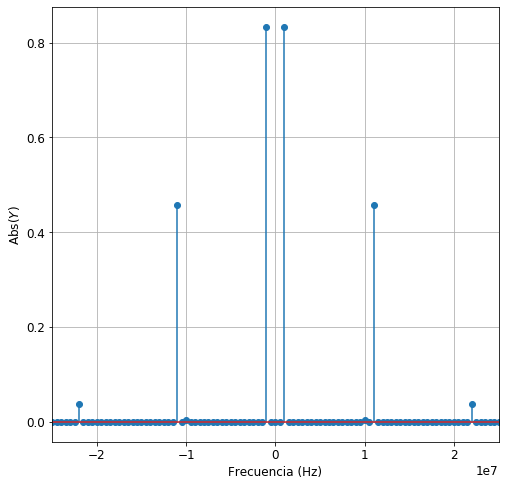

In [64]:
plt.stem(frq, np.abs(Fvdt))  

plt.xlim(-25e6,25e6)



plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()

In [65]:
# FFT
Tvdt = ifft(Fvdt)   # Normalizada



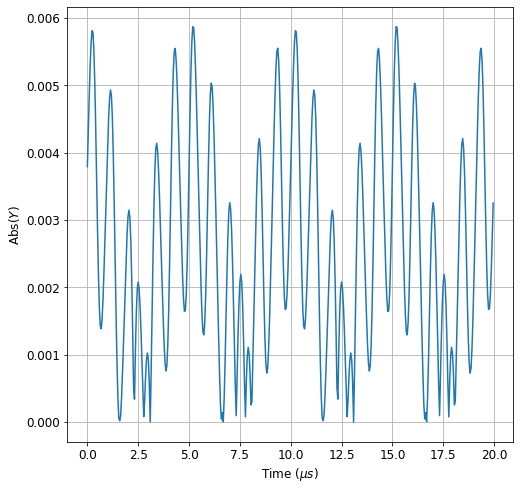

In [66]:
plt.plot(time/.1e-6, abs(Tvdt) )  

plt.xlabel('Time ($\mu s$)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()